# Data Exploration

Creating our data set was an important step for our project. Since we now have the data saved in a external _csv_ file, we can start getting familiar with the dataset. We can explore what are the News sources report about Taiwan elections, and which dates are the news about Taiwan elections appeared in the English newspapers. In order to do so, we need to import three main packages for data analysis,  __```Numpy, Pandas and Matplotlib```__.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

Now we will read our dataset into a pandas dataframe object and read the first five rows of the dataset.

In [2]:
tw_news = pd.read_csv('tw_dataset.csv', date_parser='date')

tw_news = tw_news.sort_values(by='date')
tw_news.head()

,source,date,URL,title,fulltext,description
5,Reuters,04-November-2019,https://www.reuters.com/article/us-china-taiwa...,"China offers more access for Taiwan firms, Tai...",3 Min ReadBEIJING/TAIPEI (Reuters) - China unv...,China unveiled measures on Monday to further o...
13,Reuters,05-November-2019,https://www.reuters.com/article/us-china-taiwa...,China says will 'fully respect' Taiwan's way o...,3 Min ReadBEIJING/TAIPEI (Reuters) - China wil...,"China will ""fully respect"" Taiwan's way of lif..."
12,Reuters,07-November-2019,https://www.reuters.com/article/us-taiwan-dipl...,Taiwan warns of possible attack if China's slo...,5 Min ReadTAIPEI (Reuters) - Beijing could res...,Beijing could resort to military conflict with...
3,Reuters,13-November-2019,https://www.reuters.com/article/us-china-taiwa...,China says Taiwan scaremongering with attack talk,3 Min ReadBEIJING (Reuters) - China said on We...,China said on Wednesday Taiwan was scaremonger...
7,Telegraph.co.uk,18-November-2019,https://www.telegraph.co.uk/news/2019/11/18/ta...,Taiwan accuses China of intimidation ahead of ...,Taiwan has accused China of attempting to inti...,Taiwan has accused China of attempting to inti...


In [16]:
print ('There are {} observations and {} columns in this dataset.'.format(tw_news.shape[0], tw_news.shape[1]))

There are 20 observations and 6 columns in this dataset.


In [3]:
sources = tw_news['source'].value_counts().sort_index()
dates =tw_news['date'].value_counts().sort_index()


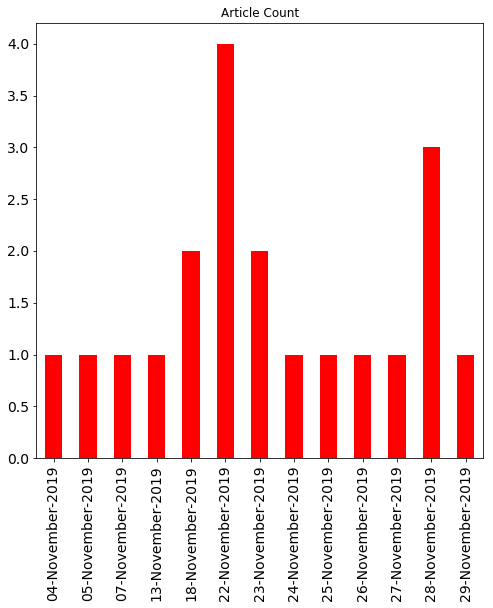

In [4]:
dates.plot(kind='bar',  color='red', title='Article Count', figsize=(8,8), fontsize=14)
plt.show()

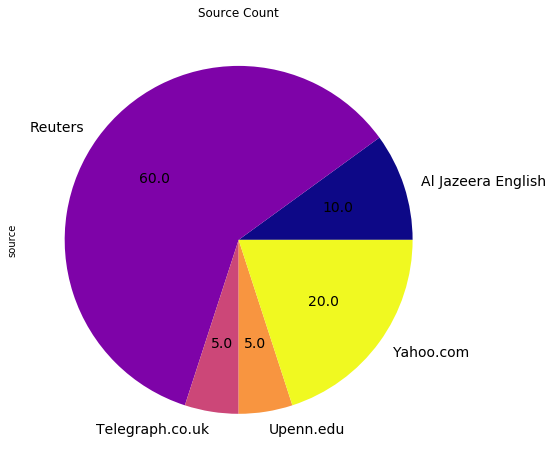

In [5]:
sources.plot(kind='pie', colormap='plasma', title = 'Source Count', autopct ='%.1f',figsize=(8,8), fontsize=14)
plt.show()

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords


In [7]:
def sum_text(dataset):
    '''
    takes pd dataset returns connotated text
    '''
    sumoftxt = ''
    for i in dataset['fulltext']:
        sumoftxt += i
    return sumoftxt

In [8]:
text = sum_text(tw_news)

stopwd= STOPWORDS

stopwd.update(set(stopwords.words('english')))
stopwd.update({'Taiwan','Chinese','said','told', 'Taiwanese'})


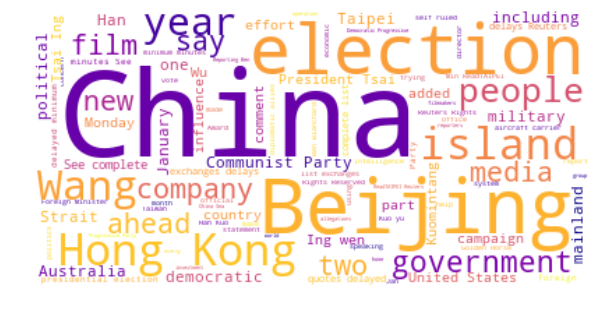

In [9]:
tw_cloud = WordCloud(stopwords= stopwd, background_color='white', max_words=100, colormap='plasma' ).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(tw_cloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [10]:
import numpy as np
from PIL import Image

In [11]:
tw_map = np.array(Image.open('images/tw_map2.jpg'))



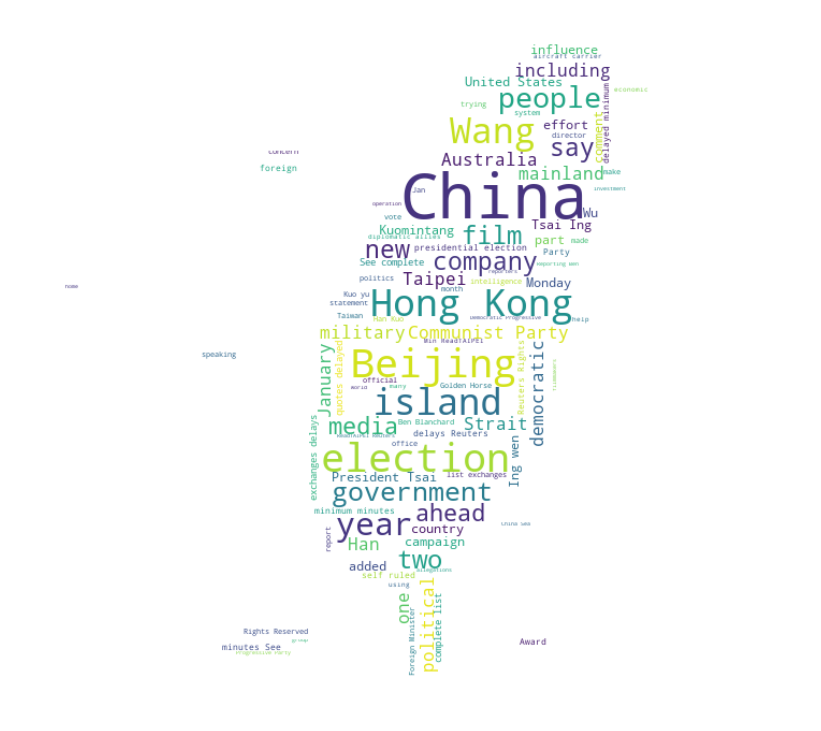

In [12]:
tw_cloud = WordCloud(stopwords= stopwd, background_color='white', max_words=100, mask=tw_map ).generate(text)

plt.figure(figsize=(14,14))
plt.imshow(tw_cloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [15]:
tw_cloud.to_file('tw_cloud.png')